### Periodogram Project
Kellie Gadeken <br>
ASTR 3800 <br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
from astropy.stats import LombScargle
import scipy.signal as signal
from scipy.signal import find_peaks
from sklearn.utils import shuffle


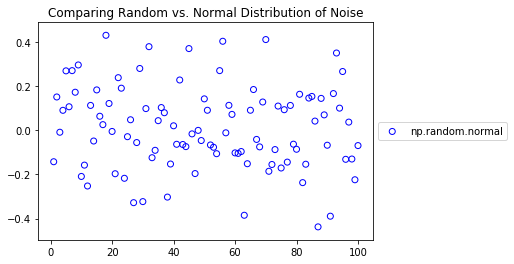

Normal distribution works better.


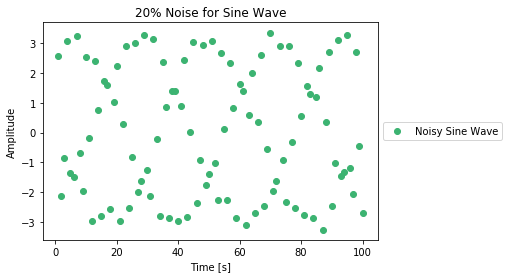

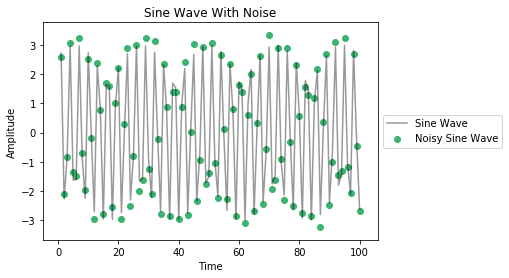

In [3]:
# create dataset similar to Horne & Baliunas (sine wave with noise)
N= 100
time = np.linspace(1.,100.,100)  # times
#print(time)
amplitude = 3

np.random.seed(seed=13) # set random seed
noise = np.random.normal(0,1,100)*.20  # create random noise with 20% of signal amplitude
#noise2 = .40 * np.random.random(size=100) -.2  # test random random noise 
#print(noise)

y = amplitude * np.sin(2.*time)  # make a sine wave

# frequency
freq = np.fft.fftfreq(N,time[1]-time[0])*2.0*np.pi  # set frequencies
freq = freq[freq>0]  # eliminate all negative frequencies
#print(freq)

# noisy amplitude
amplitude_with_noise = y + noise  # add the random normal noise to the sine wave
#amplitude_with_noise2 = y + noise2  # add the random noise to the sine wave

# look at noise produced
plt.scatter(time,noise, label='np.random.normal',facecolors='none',edgecolors='blue')
#plt.scatter(time,noise2, label='np.random.random',color='orange')  # seeing if np.random is better
plt.title("Comparing Random vs. Normal Distribution of Noise")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
print('Normal distribution works better.')

#plt.plot(time,amplitude, label = 'Sine Wave',c='k',alpha=0.4)  # plot nice sine wave
#plt.plot(time,amplitude_with_noise, label='Noisy Sine Wave',c='mediumseagreen')   # plot sine wave with noise
plt.scatter(time,amplitude_with_noise, label='Noisy Sine Wave',c='mediumseagreen')   # plot sine wave with noise
#plt.scatter(time,amplitude_with_noise2, label='Noisy Sine Wave Random',c='mediumseagreen')   # testing is np.random is better
plt.title('20% Noise for Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(time,y, label = 'Sine Wave',c='k',alpha=0.4)  # plot nice sine wave
#plt.plot(time,amplitude_with_noise, label='Noisy Sine Wave',c='mediumseagreen')   # plot sine wave with noise
plt.scatter(time,amplitude_with_noise, label='Noisy Sine Wave',c='mediumseagreen')   # plot sine wave with noise
#plt.scatter(time,amplitude_with_noise2, label='Noisy Sine Wave Random',c='mediumseagreen')   # testing if np.random is better
plt.title('Sine Wave With Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [138]:
#scipy.signal.lombsc?

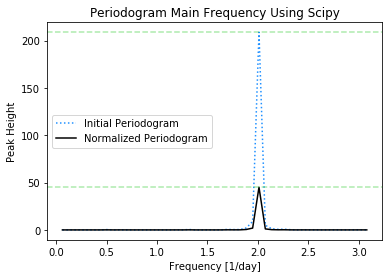

The max height of the normalized periodogram is 45.11.


In [4]:

#scipy.signal.lombscargle needs (x,y,f)
periodogram = scipy.signal.lombscargle(time,amplitude_with_noise,freq)#, normalize=True)
plt.plot(freq,periodogram, color='dodgerblue',label = 'Initial Periodogram',linestyle=':')
plt.plot(freq,(periodogram/np.var(amplitude_with_noise)),c='k',label='Normalized Periodogram')  # normalized data 
plt.title('Periodogram Main Frequency Using Scipy')
plt.xlabel('Frequency [1/day]')
plt.ylabel('Peak Height')
plt.axhline(np.max(periodogram),linestyle='--',color='limegreen',alpha=0.4)
plt.axhline(np.max(periodogram/np.var(amplitude_with_noise)),linestyle='--',color='limegreen',alpha=0.4)
plt.legend()
plt.show()
#print(np.var(periodogram))
# note: frequency corresponds to period of 2 set in definition of sine wave y

print(f"The max height of the normalized periodogram is {(np.max(periodogram/np.var(amplitude_with_noise))):.2F}.")


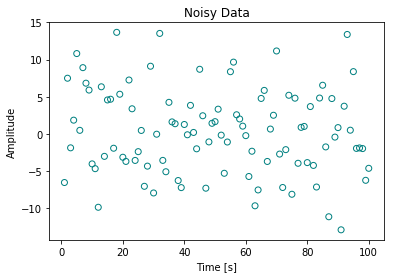

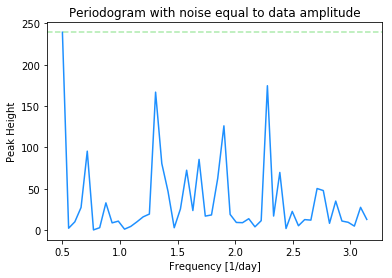

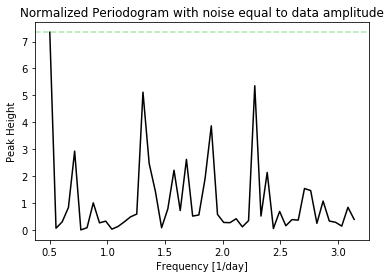

The max height of the normalized periodogram is 7.35 .
False Alarm Probability:  0.07611833864843243 , so there is a 7.6% possibility of this occurring by chance.
There is a 92.39% chance of being the tallest peak.


In [8]:
# 100 data points where noise amplitude is equal to the data (sinusoid)

#print(4/ (2*np.pi))
np.random.seed(seed=13) # set random seed
noise3 = 2. *np.random.normal(0,amplitude,100) # set noise equal to amplitude of data
# f = omega / 2pi
y3 = amplitude * np.sin(time*4)  # make a sine wave
amplitude_with_noise3 = y3 + noise3  # add the random noise to the sine wave
z3 = np.var(amplitude_with_noise3)   # normalized data 

#print("normalized noisy data: ",z3)

# define new frequency for data of noise with same amplitude as data
freq3 = np.linspace((.5 *1.0),np.pi)
#print(freq3)

# plot the noise to look at
plt.scatter(time,amplitude_with_noise3,facecolors='none', edgecolors='teal')
plt.title('Noisy Data')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

#plt.scatter(time,data_scram-y3,color='teal')
#plt.title('Only Noise')
#plt.xlabel('Time [s]')
#plt.ylabel('Amplitude')
#plt.show()

# plot periodogram
periodogram3 = scipy.signal.lombscargle(time,amplitude_with_noise3,freq3)
plt.plot(freq3,periodogram3, color='dodgerblue')
plt.axhline(np.max(periodogram3),linestyle='--',color='limegreen',alpha=0.4)
#plt.plot(freq,periodogram4, color='navy')
#plt.plot(freq,z3)
#plt.plot(freq,(periodogram/np.var(amplitude_with_noise3)),c='k')  # normalized data? 
plt.title('Periodogram with noise equal to data amplitude')
plt.xlabel('Frequency [1/day]')
plt.ylabel('Peak Height')
plt.show()

plt.plot(freq3,(periodogram3/np.var(amplitude_with_noise3)),c='k')  # normalized data 
plt.axhline(np.max(periodogram3/np.var(amplitude_with_noise3)),linestyle='--',color='limegreen',alpha=0.4)
plt.title('Normalized Periodogram with noise equal to data amplitude')
plt.xlabel('Frequency [1/day]')
plt.ylabel('Peak Height')
#plt.xlim([0,3.5])
plt.show()

# false alarm probability
height = np.max(periodogram3)
#print(height)

zz = np.max(periodogram3/z3)  # max of normalized data
#print("zz: ", np.max(periodogram3/z3))  # height of normalized data

n_i = -6.362 + 1.193*N + 0.00098*(N**2)
#print(n_i)
false_alarm = 1 - (1 - np.exp(-zz))**n_i

print(f"The max height of the normalized periodogram is {zz:.2F} .")
print("False Alarm Probability: ",false_alarm, ", so there is a 7.6% possibility of this occurring by chance.")
print(f"There is a {(100-false_alarm*100):.2F}% chance of being the tallest peak.")


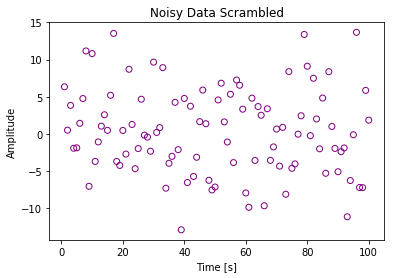

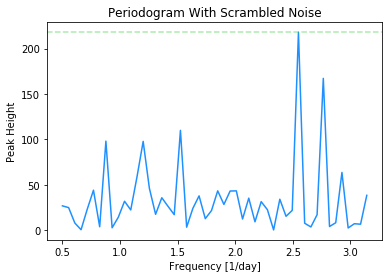

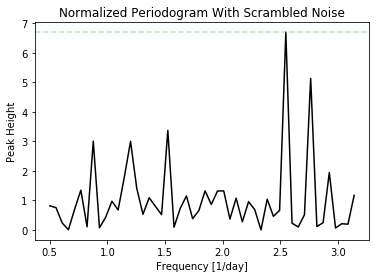

The max height of the normalized periodogram is 6.69 .
False Alarm Probability:  0.14136387904126346 , so there is a 14.14% possibility of this occurring by chance.
There is a 85.86% chance of being the tallest peak.


In [20]:
# randomly scramble data in time

data_scram = shuffle(amplitude_with_noise3) # scramble data
#print(data_scram)
z_scram = np.var(amplitude_with_noise3)   # normalized data -> should be same as before

# plot noisy data
# plot the noise to look at
plt.scatter(time,data_scram,facecolors='none', edgecolors='purple')
plt.title('Noisy Data Scrambled')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

# plot periodogram
periodogram_scram = scipy.signal.lombscargle(time,data_scram,freq3)
plt.plot(freq3,periodogram_scram, color='dodgerblue')
plt.axhline(np.max(periodogram_scram),linestyle='--',color='limegreen',alpha=0.4)
plt.title('Periodogram With Scrambled Noise')
plt.xlabel('Frequency [1/day]')
plt.ylabel('Peak Height')
plt.show()

plt.plot(freq3,(periodogram_scram/np.var(data_scram)),c='k')  # normalized data 
plt.axhline(np.max(periodogram_scram/np.var(data_scram)),linestyle='--',color='limegreen',alpha=0.4)
plt.title('Normalized Periodogram With Scrambled Noise')
plt.xlabel('Frequency [1/day]')
plt.ylabel('Peak Height')
#plt.xlim([0,3.5])
plt.show()

zz_scram = np.max(periodogram_scram/z_scram)  # max of normalized data

n_i_scram = -6.362 + 1.193*N + 0.00098*(N**2)
#print(n_i)
false_alarm_scram = 1 - (1 - np.exp(-zz_scram))**n_i_scram

print(f"The max height of the normalized periodogram is {zz_scram:.2F} .")
print("False Alarm Probability: ",false_alarm_scram, f", so there is a {(false_alarm_scram*100):.2F}% possibility of this occurring by chance.")
print(f"There is a {(100-false_alarm_scram*100):.2F}% chance of being the tallest peak.")


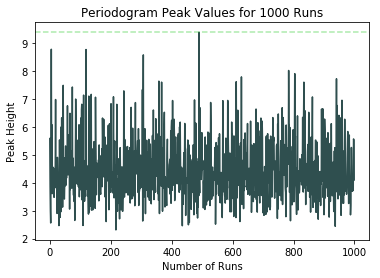

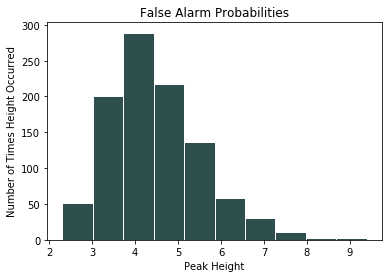

The max height of 1000 normalized periodograms is 9.39 .
The false alarm probability is 0.010177342749827512, so there is a 1.02% possibility of this occurring by chance.
There is a 98.98% chance of being the tallest peak.


In [14]:
# Scramble data many times

k=1000 # run for 1,000 loops
peaks = []
false_alarms = []
for i in range(k):
    data_scram = shuffle(amplitude_with_noise3)  # scramble data
    z_scram = np.var(amplitude_with_noise3)   # normalized data -> should be same as before
    periodogram_scram = scipy.signal.lombscargle(time,data_scram,freq3) 
    zz_scram = np.max(periodogram_scram/z_scram)  # max of normalized data
    peaks.append(zz_scram)
    n_i_scram = -6.362 + 1.193*N + 0.00098*(N**2)
    false_alarm_scram = 1 - (1 - np.exp(-zz_scram))**n_i_scram
    false_alarms.append(false_alarm_scram)

peaks_max = np.max(peaks)  # max of normalized periodogram data

# calculate false alarm probability
n_i_k = -6.362 + 1.193*N + 0.00098*(N**2)
false_alarm_k = 1 - (1 - np.exp(-peaks_max))**n_i_k

# plot the peaks for fun
plt.plot(peaks,color='darkslategrey')
plt.axhline(peaks_max,linestyle='--',color='limegreen',alpha=0.4)
plt.title(f"Periodogram Peak Values for {k} Runs")
plt.xlabel('Number of Runs')
plt.ylabel('Peak Height')
plt.show()

# plot a histogram
plt.hist(peaks,color='darkslategrey',edgecolor='white')
plt.title('False Alarm Probabilities')
plt.xlabel('Peak Height')
plt.ylabel('Number of Times Height Occurred')
plt.show()

print(f"The max height of {k} normalized periodograms is {peaks_max:.2F} .")
print(f"The false alarm probability is {false_alarm_k}, so there is a {(false_alarm_k*100):.2F}% possibility of this occurring by chance.")
print(f"There is a {(100-false_alarm_k*100):.2F}% chance of being the tallest peak.")


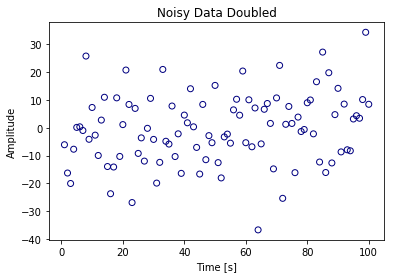

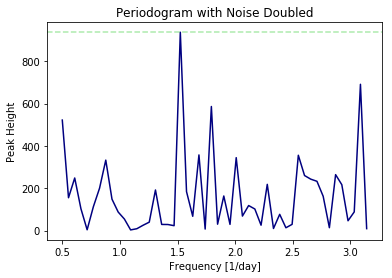

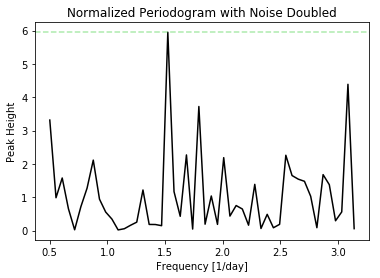

The max height of the normalized periodogram is 5.95 .
False Alarm Probability:  0.27444814386919536 , so there is a 27.44% possibility of this occurring by chance.
There is a 72.56% chance of being the tallest peak.


In [10]:
# extra credit - doubling the noise

np.random.seed(seed=33) # set random seed
noise4 = 2. *np.random.normal(0,amplitude*2,100) # set noise equal to double the amplitude of data
y4 = amplitude * np.sin(time*4)  # make a sine wave
amplitude_with_noise4 = y4 + noise4  # add the random noise to the sine wave
z4 = np.var(amplitude_with_noise4)   # normalized data 

# define new frequency for data of noise with same amplitude as data
freq4 = np.linspace((.5 *1.0),np.pi)

# plot the noisy data and the noise to look at
plt.scatter(time,amplitude_with_noise4,facecolors='none', edgecolors='navy')
plt.title('Noisy Data Doubled')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

# plot periodogram
periodogram4 = scipy.signal.lombscargle(time,amplitude_with_noise4,freq4)
plt.plot(freq4,periodogram4, color='navy')
plt.axhline(np.max(periodogram4),linestyle='--',color='limegreen',alpha=0.4)
plt.title('Periodogram with Noise Doubled')
plt.xlabel('Frequency [1/day]')
plt.ylabel('Peak Height')
plt.show()

plt.plot(freq4,(periodogram4/np.var(amplitude_with_noise4)),c='k')  # normalized data 
plt.axhline(np.max(periodogram4/np.var(amplitude_with_noise4)),linestyle='--',color='limegreen',alpha=0.4)
plt.title('Normalized Periodogram with Noise Doubled')
plt.xlabel('Frequency [1/day]')
plt.ylabel('Peak Height')
plt.show()

# false alarm probability
height = np.max(periodogram3)
zz4 = np.max(periodogram4/z4)  # max of normalized data
n_i4 = -6.362 + 1.193*N + 0.00098*(N**2)
false_alarm4 = 1 - (1 - np.exp(-zz4))**n_i4

print(f"The max height of the normalized periodogram is {zz4:.2F} .")
print("False Alarm Probability: ",false_alarm4, f", so there is a {(false_alarm4*100):.2F}% possibility of this occurring by chance.")
print(f"There is a {(100-false_alarm4*100):.2F}% chance of being the tallest peak.")
